In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mc_pion = pd.read_csv("Pion_1p1g_300MeV_recon_test.txt")
mc_compton = pd.read_csv("Compton_300MeV_recon_test.txt")


In [3]:
mc_compton.head()
mc_compton['id'] = mc_compton['id'].replace([2], 1)

In [4]:
mc_compton

,E_beam,E_gamma,theta_gamma,phi_gamma,E_p,theta_p,phi_p,MM,id
0,300.745,165.880,110.857,179.515,31.021,29.662,9.483,999.076,1
1,300.745,186.952,114.536,-128.901,26.594,30.387,70.070,966.831,1
2,300.745,193.474,142.199,134.576,43.129,16.757,-36.587,934.529,1
3,300.745,195.706,107.188,84.146,25.356,29.595,-92.565,961.759,1
4,300.745,218.917,106.207,27.699,24.277,34.185,-164.343,930.321,1
...,...,...,...,...,...,...,...,...,...
10069,300.745,198.592,112.800,63.293,18.899,27.489,-115.924,952.011,1
10070,300.745,169.184,153.462,-97.124,80.687,10.264,79.107,966.669,1
10071,300.745,192.072,149.734,-55.130,104.558,11.567,120.000,932.196,1
10072,300.745,185.161,131.823,-168.412,51.677,16.007,16.102,954.793,1


In [5]:
mc_pion

,E_beam,E_gamma,theta_gamma,phi_gamma,E_p,theta_p,phi_p,MM,id
0,300.745,82.609,75.814,-128.971,21.207,14.783,37.589,1119.019,2
1,300.745,35.895,66.153,-74.700,92.253,8.092,136.102,1168.125,2
2,300.745,85.156,114.260,-47.108,88.901,2.953,146.485,1101.213,2
3,300.745,72.588,87.188,148.198,95.589,9.751,-6.587,1125.611,2
4,300.745,52.499,76.872,-28.115,81.757,8.105,136.102,1149.701,2
...,...,...,...,...,...,...,...,...,...
1378,300.745,83.407,89.429,-40.972,89.359,11.163,150.000,1112.901,2
1379,300.745,80.534,104.276,175.292,82.781,8.104,-16.102,1110.506,2
1380,300.745,130.215,98.499,9.250,15.015,15.649,180.000,1053.794,2
1381,300.745,86.721,115.130,-60.235,98.259,6.740,90.000,1098.947,2


In [6]:
mc_sum = mc_compton.append(mc_pion, ignore_index=True)

mc_sum.head()
mc_sum.drop(["E_beam"], axis = 1, inplace = True)
mc_sum.drop(["phi_gamma"], axis = 1, inplace = True)
mc_sum.drop(["phi_p"], axis = 1, inplace = True)

C:\Users\Khach\AppData\Local\Temp\ipykernel_11148\293830423.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mc_sum = mc_compton.append(mc_pion, ignore_index=True)


In [7]:
mc_sum_reshuffle2 = mc_sum.sample(frac = 1).reset_index()
mc_sum_reshuffle2.drop("index", axis =1, inplace = True)

In [8]:
mc_sum_reshuffle2.head()

,E_gamma,theta_gamma,E_p,theta_p,MM,id
0,184.603,140.581,48.794,11.681,949.474,1
1,183.378,105.978,16.636,33.519,979.771,1
2,216.988,96.370,15.119,30.928,944.747,1
3,181.149,149.957,105.649,9.738,949.483,1
4,210.898,102.773,22.997,36.100,945.555,1


In [9]:
mc_sum_reshuffle2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11457 entries, 0 to 11456
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   E_gamma      11457 non-null  float64
 1   theta_gamma  11457 non-null  float64
 2   E_p          11457 non-null  float64
 3   theta_p      11457 non-null  float64
 4   MM           11457 non-null  float64
 5   id           11457 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 537.2 KB


In [6]:
#mc_sum_reshuffle2_theta = mc_sum_reshuffle2
#mc_sum_reshuffle2_theta = mc_sum_reshuffle2[mc_sum_reshuffle2_theta["theta_gamma"] > 30.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["theta_gamma"] > 40.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["theta_gamma"] < 140.]
#mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["MM"] < 1000.]
#mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["MM"] > 920.]


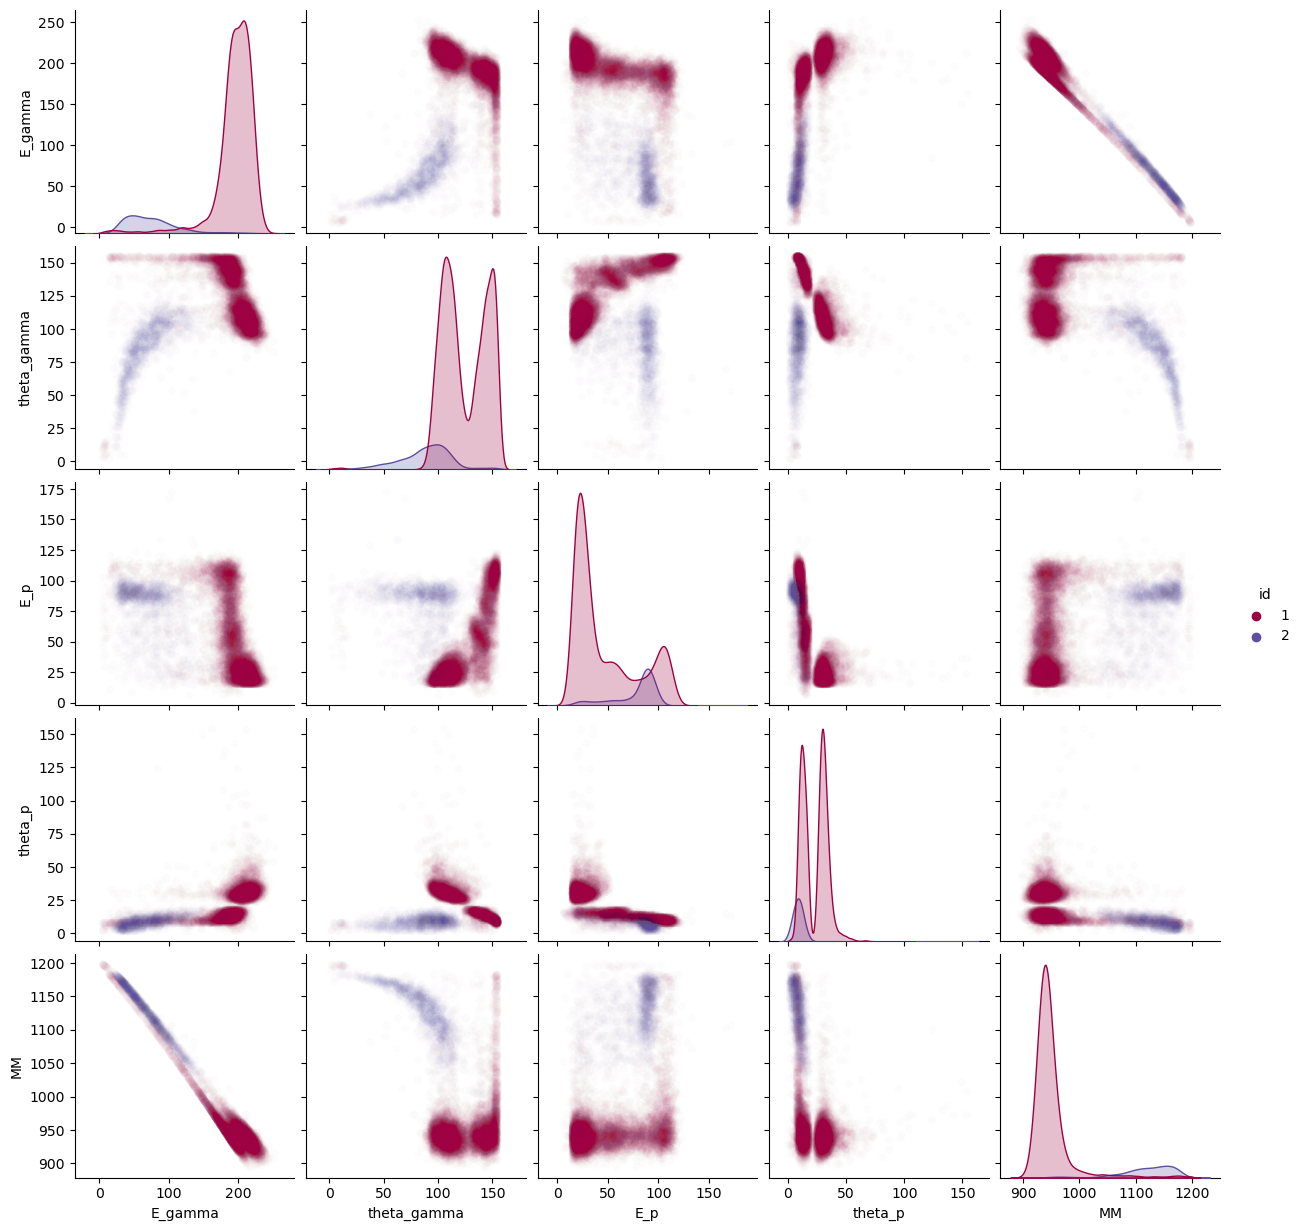

In [10]:
sns.pairplot(mc_sum_reshuffle2, hue = "id",  kind='scatter', plot_kws={'alpha':0.01}, palette='Spectral')

In [18]:
#mc_compton.drop(["E_beam"], axis = 1, inplace = True)
#mc_compton.drop(["phi_gamma"], axis = 1, inplace = True)
#mc_compton.drop(["phi_p"], axis = 1, inplace = True)

In [11]:
#mc_compton.drop(["id"], axis = 1, inplace = True)

<AxesSubplot:>

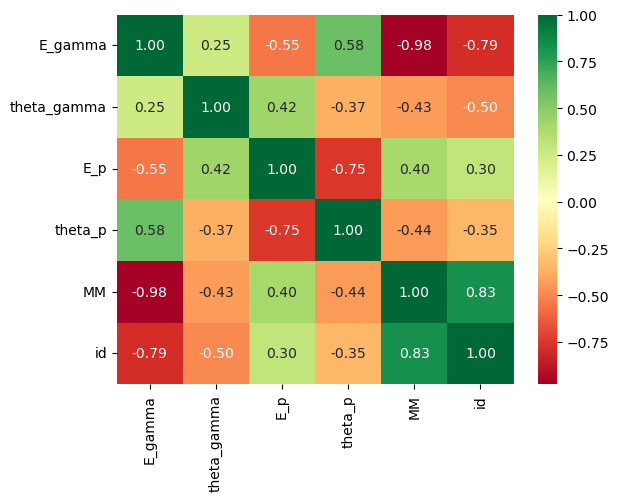

In [11]:
sns.heatmap(mc_sum_reshuffle2.corr(), annot = True, fmt='.2f', cmap='RdYlGn')

In [13]:
mc_sum_reshuffle3 = mc_sum_reshuffle2[np.isfinite(mc_sum_reshuffle2).all(1)]


In [14]:
mc_sum_reshuffle3.head(2)

,E_gamma,theta_gamma,E_p,theta_p,MM,id
0,184.603,140.581,48.794,11.681,949.474,1
1,183.378,105.978,16.636,33.519,979.771,1


In [15]:
from sklearn.model_selection import train_test_split
#X = mc_sum_reshuffle3[['E_gamma', 'theta_gamma', 'E_p', 'theta_p']]
#y = mc_sum_reshuffle3['MM']
#y = mc_pion['id']
X = mc_sum_reshuffle3[['E_gamma', 'theta_gamma', 'MM', 'theta_p']]
y = mc_sum_reshuffle3['id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [16]:
X_test.head(2)

,E_gamma,theta_gamma,MM,theta_p
11154,177.325,145.156,958.008,11.166
101,177.440,143.477,958.781,13.550


In [17]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [19]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99      3327
           2       0.91      0.87      0.89       454

    accuracy                           0.97      3781
   macro avg       0.95      0.93      0.94      3781
weighted avg       0.97      0.97      0.97      3781

[[3288   39]
 [  58  396]]


In [21]:
#y_hats = model.predict(X_test)
#y_test['preds'] = predictions
#frame = {'preds': predictions}
#result = pd.DataFrame(y_test)
#result.rename(columns = {'id':'id_pred'}, inplace = True)

address = [predictions] 
# Using 'Address' as the column name
# and equating it to the list
X_test["id_predicted"] = predictions

y_test_array = y_test.to_numpy() 

#difference = [predictions - y_test] 
X_test["id_initial"] = y_test_array
#X_test.drop(["difference"], axis = 1, inplace = True)

difference = (predictions - y_test_array) 
X_test["difference"] = difference

X_test.head(10)

,E_gamma,theta_gamma,MM,theta_p,id_predicted,id_initial,difference
11154,177.325,145.156,958.008,11.166,1,1,0
101,177.440,143.477,958.781,13.550,1,1,0
758,207.305,93.765,960.642,32.931,1,1,0
7747,206.490,102.937,951.439,32.031,1,1,0
9669,212.589,102.986,942.971,32.034,1,1,0
7145,6.111,13.794,1197.148,7.028,2,1,1
9761,173.425,138.369,967.994,17.534,1,1,0
8092,173.360,152.048,960.745,10.219,1,1,0
8781,189.917,133.129,946.582,16.012,1,1,0
9159,208.607,109.520,941.207,32.475,1,1,0


<AxesSubplot:xlabel='MM', ylabel='theta_gamma'>

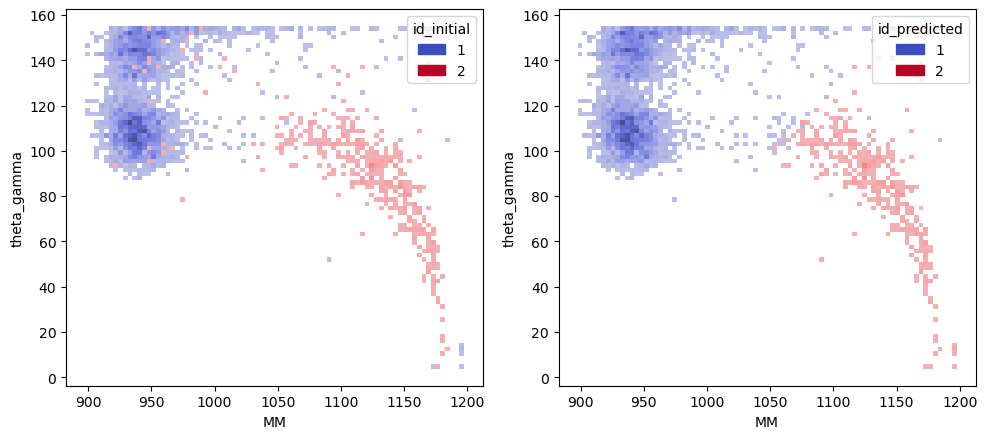

In [22]:
#sns.pairplot(X_test, hue = "difference",  kind='scatter', plot_kws={'alpha':0.03}, palette='coolwarm')
#sns.histplot(data = X_test, x = 'MM', y = 'theta_gamma', hue= 'id_initial', palette='coolwarm', bins = 80)
#sns.histplot(data = X_test, x = 'MM', hue= 'id_predicted', palette='coolwarm', bins = 100)
#ratio = X_test['id_predicted']/X_test['id_initial']
#sns.histplot(data = X_test, x = 'id_predicted', y = 'id_initial', palette='coolwarm')
#sns.histplot(data = X_test, x = 'MM', palette='coolwarm', hue = 'difference', bins = 100)

plt.rcParams["figure.figsize"] = [10.0, 4.5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.histplot(data = X_test, x = 'MM', y = 'theta_gamma', hue= 'id_initial', palette='coolwarm', bins = 80, ax=axes[0])
sns.histplot(data = X_test, x = 'MM', y = 'theta_gamma', hue= 'id_predicted', palette='coolwarm', bins = 80, ax=axes[1])
